In [1]:
import pandas as pd
import numpy as np
np.random.seed(2018)

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.model_selection import cross_validate

import xgboost as xgb

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_train = pd.read_csv('../input/train.csv')
df_test = pd.read_csv('../input/test.csv')

df_all = pd.concat([df_train, df_test])

In [3]:
df_train.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
283,284,1,3,"Dorking, Mr. Edward Arthur",male,19.0,0,0,A/5. 10482,8.0500,NaN,S
607,608,1,1,"Daniel, Mr. Robert Williams",male,27.0,0,0,113804,30.5000,NaN,S
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,A/5. 851,14.5000,NaN,S
177,178,0,1,"Isham, Miss. Ann Elizabeth",female,50.0,0,0,PC 17595,28.7125,C49,C
783,784,0,3,"Johnston, Mr. Andrew G",male,NaN,1,2,W./C. 6607,23.4500,NaN,S
482,483,0,3,"Rouse, Mr. Richard Henry",male,50.0,0,0,A/5 3594,8.0500,NaN,S
582,583,0,2,"Downton, Mr. William James",male,54.0,0,0,28403,26.0000,NaN,S
424,425,0,3,"Rosblom, Mr. Viktor Richard",male,18.0,1,1,370129,20.2125,NaN,S
79,80,1,3,"Dowdell, Miss. Elizabeth",female,30.0,0,0,364516,12.4750,NaN,S


In [4]:
df_train.select_dtypes(include=[np.int, np.float]).head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [5]:
def get_feats(df):
    feats = df.select_dtypes(include=[np.int64]).columns.values
    black_list = ['PassengerId', 'Survived']
    
    return [feat for feat in feats if feat not in black_list]


def feature_engineering(df):
    df['sex_cat'] = pd.factorize( df['Sex'] )[0]
    df['embarked_cat'] = pd.factorize( df['Embarked'] )[0]
    
    return df

def get_models():
    return [
        ('lr', LogisticRegression()),
        ('dt', DecisionTreeClassifier()),
        ('rf', RandomForestClassifier()),
        ('et', ExtraTreesClassifier()),
    ]

In [6]:
def plot_result(model_name, result, ylim=(0, 1.)):
    mean_train = np.round( np.mean(result['train_score']), 2 )
    mean_test = np.round( np.mean(result['test_score']), 2 )
    
    plt.title('{0}: cross validation\nmean-train-acc:{1}\nmean-test-acc:{2}'.format(model_name, mean_train, mean_test))
    plt.plot( result['train_score'], 'r-o', label="train" )
    plt.plot( result['test_score'], 'g-o', label="test" )
    plt.legend(loc='best')
    plt.ylabel('Accuracy')
    plt.xlabel('# of fold')
    plt.ylim(*ylim)
    plt.show()

lr


/Users/vova/miniconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


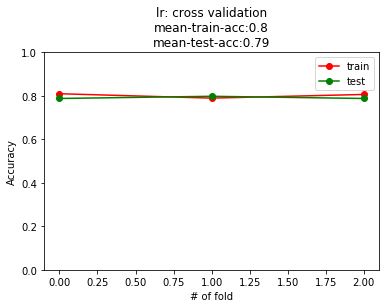

dt


/Users/vova/miniconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


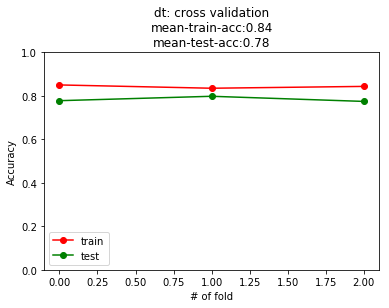

rf


/Users/vova/miniconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


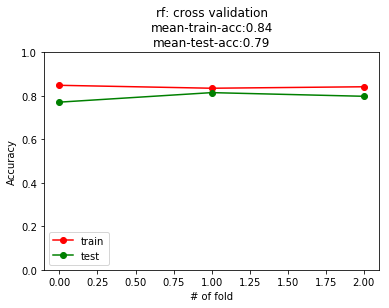

et


/Users/vova/miniconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


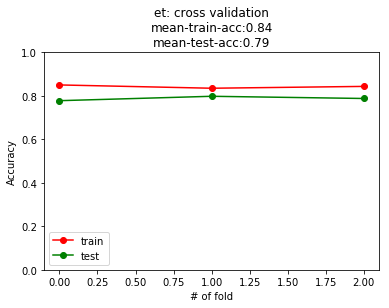

In [7]:
df = feature_engineering(df_train)
get_feats(df)

X = df_train[ get_feats(df_train) ].values
y = df_train[ 'Survived' ].values

for model_name, model in get_models():
    result = cross_validate(model, X, y, scoring='accuracy', cv=3)
    print(model_name)

    plot_result(model_name, result)

In [8]:
def make_prediction(df_train, df_test, model, output_file_name):
    train = feature_engineering(df_train)
    test = feature_engineering(df_test)

    feats = get_feats(train)

    X_train = train[feats].values
    y_train = train['Survived'].values
    X_test = test[feats]

    print(model)
    model.fit(X_train, y_train)

    test['Survived'] = model.predict(X_test)
    test[ ['PassengerId', 'Survived'] ].to_csv('../output/' + output_file_name, index=False)

## Linear Model

In [9]:
make_prediction(df_train, df_test, LogisticRegression(), 'linear.csv')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


![](../images/kaggle_076.png)

### Random Forest

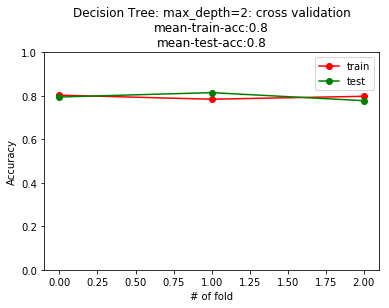

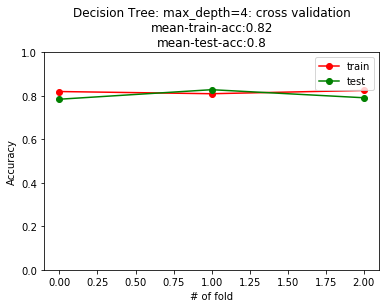

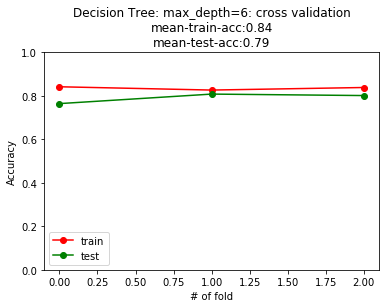

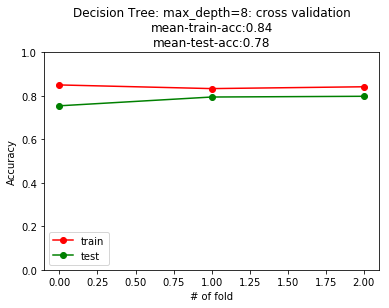

In [10]:
for max_depth in range(2, 10, 2):
    model = RandomForestClassifier(max_depth=max_depth, n_estimators=15)
    result = cross_validate(model, X, y, scoring='accuracy', cv=3)
    plot_result("Decision Tree: max_depth=%s" % max_depth, result)

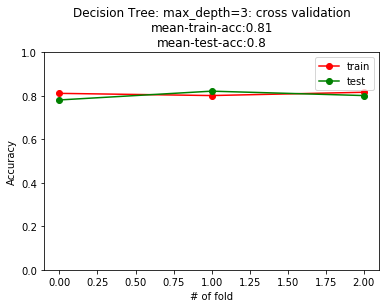

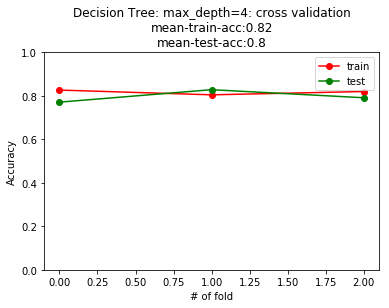

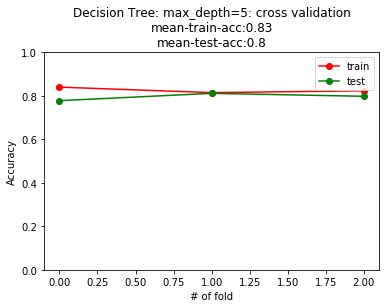

In [11]:
for max_depth in range(3, 6, 1):
    model = RandomForestClassifier(max_depth=max_depth, n_estimators=15)
    result = cross_validate(model, X, y, scoring='accuracy', cv=3)
    plot_result("Decision Tree: max_depth=%s" % max_depth, result)

In [12]:
model = RandomForestClassifier(max_depth=4, n_estimators=15, random_state=2018)
make_prediction(df_train, df_test, model, 'rf_md4_ne15.csv')

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=1,
            oob_score=False, random_state=2018, verbose=0,
            warm_start=False)


![](../images/kaggle_rf_simple.png)

## Feature Engineering

### Titles

In [80]:
df_train['Name'].map(lambda x: x.split(',')[1].split('.')[0].lower() ).value_counts()

 mr              517
 miss            182
 mrs             125
 master           40
 dr                7
 rev               6
 col               2
 mlle              2
 major             2
 the countess      1
 don               1
 mme               1
 sir               1
 capt              1
 lady              1
 jonkheer          1
 ms                1
Name: Name, dtype: int64

In [90]:
df_test['Name'].map(lambda x: x.split(',')[1].split('.')[0].lower() ).value_counts()

 mr        240
 miss       78
 mrs        72
 master     21
 rev         2
 col         2
 ms          1
 dr          1
 dona        1
Name: Name, dtype: int64

In [91]:
df_all['Name'].map(lambda x: x.split(',')[1].split('.')[0].lower() ).value_counts()

 mr              757
 miss            260
 mrs             197
 master           61
 rev               8
 dr                8
 col               4
 ms                2
 mlle              2
 major             2
 jonkheer          1
 don               1
 lady              1
 sir               1
 capt              1
 mme               1
 the countess      1
 dona              1
Name: Name, dtype: int64

In [16]:
popular_titles = ["mr", "miss", "mrs", "master", "dr", "rev"]
df_all['Name'].map(lambda x: x.split(',')[1].split('.')[0].lower().strip() ).map(lambda x: x if x in popular_titles else "other").value_counts()

mr        757
miss      260
mrs       197
master     61
other      18
dr          8
rev         8
Name: Name, dtype: int64

In [17]:
def feature_title(df):
    df['title'] = df['Name'].map(lambda x: x.split(',')[1].split('.')[0].lower().strip() )
    popular_titles = ["mr", "miss", "mrs", "master", "dr", "rev"]
    df['title_norm'] = df['title'].map(lambda x: x if x in popular_titles else "other")
    df['title_norm_cat'] = pd.factorize( df['title_norm'] )[0]
    
    return df

In [18]:
df = feature_title(df_all)
df['title_norm'].value_counts()

mr        757
miss      260
mrs       197
master     61
other      18
dr          8
rev         8
Name: title_norm, dtype: int64

### Cabin

In [19]:
df_all['Cabin'].map(lambda x: 'missing' if str(x) == 'nan' else x[0] ).value_counts()

missing    1014
C            94
B            65
D            46
E            41
A            22
F            21
G             5
T             1
Name: Cabin, dtype: int64

### Family relationships

In [20]:
df_all.apply(lambda x: x['Parch'] + x['SibSp'], axis=1).value_counts()

0     790
1     235
2     159
3      43
5      25
4      22
6      16
10     11
7       8
dtype: int64

In [21]:
#df_train.apply(lambda x: 'nofamily' if x['Parch'] + x['SibSp'] == 0 else '{0}-{1}'.format(x['Name'].split(',')[0].strip(), x['Parch'] + x['SibSp']), axis=1).value_counts()

### Age

In [22]:
print(df_all.shape)
df_all.Age.describe()

(1309, 15)


count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

In [23]:
df = feature_title(df_all)
missing_ages = df.groupby('title_norm')['Age'].agg([np.mean, np.median]).to_dict()['median']
df['Age'] = df.apply( lambda x: x['Age'] if str(x['Age']) != 'nan' else missing_ages[x['title_norm']], axis=1 )

In [24]:
age_bins = [0, 1, 3, 5, 9, 15, 20, 40, 60, 100]
pd.cut(df["Age"], bins=age_bins).astype(object).value_counts()

(20, 40]     824
(40, 60]     196
(15, 20]     133
(9, 15]       33
(60, 100]     33
(5, 9]        26
(3, 5]        23
(0, 1]        22
(1, 3]        19
Name: Age, dtype: int64

### Fare

In [50]:
print(df_all.shape)
df_all['Fare'].describe()

(1309, 23)


count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

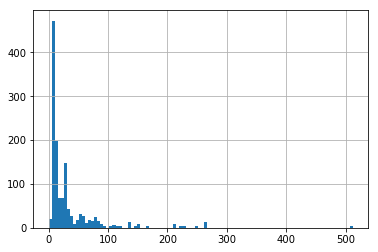

In [26]:
df_all['Fare'].hist(bins=100);

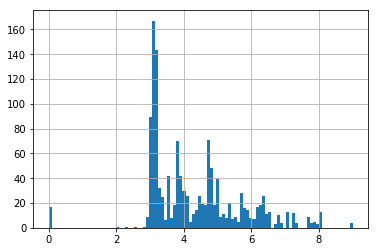

In [27]:
np.log2( df_all['Fare'] + 1 ).hist(bins=100)

## Cabin

In [60]:
df = df_all.copy()

df['Cabin'].unique()
df['cabin_norm'] = df['Cabin'].map(lambda x: 'missing' if str(x) == 'nan' else x[0] )

df.cabin_norm.value_counts()

missing    1014
C            94
B            65
D            46
E            41
A            22
F            21
G             5
T             1
Name: cabin_norm, dtype: int64

In [47]:
def feature_engineering(df):
    df['sex_cat'] = pd.factorize( df['Sex'] )[0]
    df['embarked_cat'] = pd.factorize( df['Embarked'] )[0]
    
    df = feature_title(df)
    
    df['cabin_norm'] = df['Cabin'].map(lambda x: 'missing' if str(x) == 'nan' else x[0] )
    df['cabin_norm_cat'] = pd.factorize( df['cabin_norm'] )[0]
    
    df['family_size'] = df.apply(lambda x: x['Parch'] + x['SibSp'], axis=1)
    df["single"] = df["family_size"].apply(lambda x: 1 if x == 0 else 0)

    df['fare_log'] = np.log2( df['Fare'] + 1 )
    
    missing_ages = df.groupby('title_norm')['Age'].agg([np.mean, np.median]).to_dict()['median']
    df['Age'] = df.apply( lambda x: x['Age'] if str(x['Age']) != 'nan' else missing_ages[x['title_norm']], axis=1 )
    
    age_bins = [0, 1, 3, 5, 9, 15, 20, 40, 60, 100]
    df['age_bin'] = pd.factorize( pd.cut(df["Age"], bins=age_bins).astype(object) )[0]

    return df

In [48]:
# df_train = pd.read_csv('../input/train.csv')
# df_test = pd.read_csv('../input/test.csv')

# df_all = pd.concat([df_train, df_test])

['Parch', 'Pclass', 'SibSp', 'title_norm_cat', 'sex_cat', 'embarked_cat', 'cabin_norm_cat', 'family_size', 'age_bin', 'single']
lr


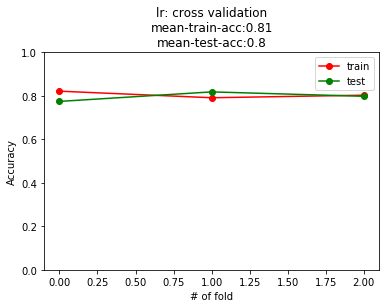

dt


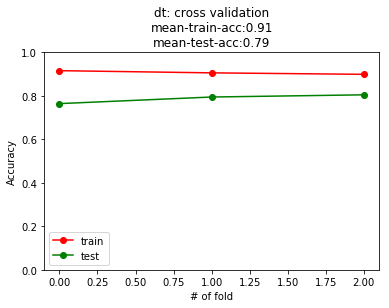

rf


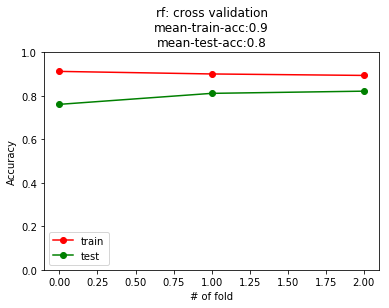

et


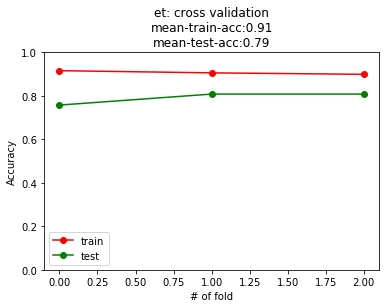

In [49]:
df = feature_engineering(df_all)
feats = get_feats(df)
print(feats)

train = df[ ~df.Survived.isnull() ]

X = train[ feats ].values
y = train[ 'Survived' ].values

for model_name, model in get_models():
    result = cross_validate(model, X, y, scoring='accuracy', cv=3)
    print(model_name)

    plot_result(model_name, result)

### Random Forest

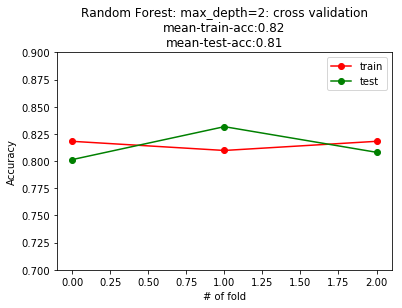

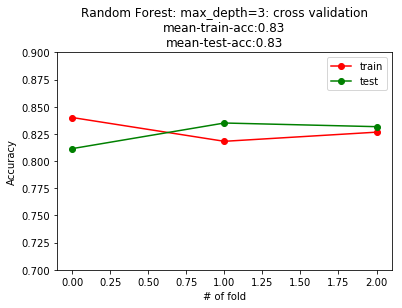

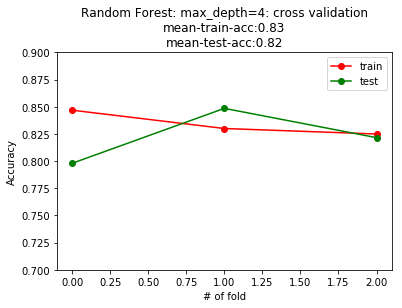

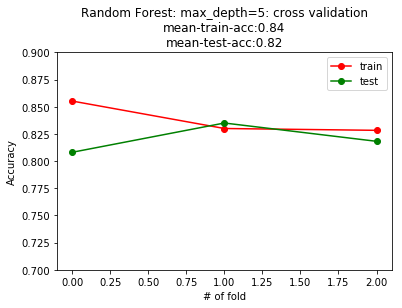

In [31]:
for max_depth in range(2, 6, 1):
    model = RandomForestClassifier(max_depth=max_depth, n_estimators=20, min_samples_leaf=8, random_state=2018)
    result = cross_validate(model, X, y, scoring='accuracy', cv=3)
    plot_result("Random Forest: max_depth=%s" % max_depth, result, ylim=(0.7, 0.9))

In [33]:
df_train, df_test = df_all[ ~df.Survived.isnull() ].copy(), df[ df.Survived.isnull() ].copy()

model = model = RandomForestClassifier(max_depth=4, n_estimators=20, min_samples_leaf=8, random_state=2018)
make_prediction(df_train, df_test, model, 'rf_md4_ne20_sl8_fe.csv')

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=8, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=2018, verbose=0,
            warm_start=False)


![](../images/kaggle_078.png)

## Ticket

In [61]:
df['Ticket'].value_counts()

CA. 2343            11
CA 2144              8
1601                 8
347077               7
S.O.C. 14879         7
3101295              7
PC 17608             7
347082               7
113781               6
347088               6
382652               6
19950                6
113503               5
349909               5
PC 17757             5
W./C. 6608           5
4133                 5
16966                5
220845               5
SC/Paris 2123        4
C.A. 33112           4
113760               4
PC 17483             4
LINE                 4
W./C. 6607           4
36928                4
2666                 4
24160                4
C.A. 2315            4
230136               4
                    ..
2624                 1
32302                1
324669               1
2681                 1
21332                1
372622               1
SOTON/O2 3101284     1
315084               1
248706               1
350054               1
SOTON/O2 3101287     1
349220               1
65303      

In [94]:
df[ df.Ticket == 'CA. 2343' ]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,title_norm,title_norm_cat,sex_cat,embarked_cat,cabin_norm,cabin_norm_cat,family_size,fare_log,age_bin,single
159,4.0,NaN,S,69.55,"Sage, Master. Thomas Henry",2,160,3,male,8,...,master,3,0,0,missing,0,10,6.140574,4,0
180,22.0,NaN,S,69.55,"Sage, Miss. Constance Gladys",2,181,3,female,8,...,miss,2,1,0,missing,0,10,6.140574,0,0
201,29.0,NaN,S,69.55,"Sage, Mr. Frederick",2,202,3,male,8,...,mr,0,0,0,missing,0,10,6.140574,0,0
324,29.0,NaN,S,69.55,"Sage, Mr. George John Jr",2,325,3,male,8,...,mr,0,0,0,missing,0,10,6.140574,0,0
792,22.0,NaN,S,69.55,"Sage, Miss. Stella Anna",2,793,3,female,8,...,miss,2,1,0,missing,0,10,6.140574,0,0
846,29.0,NaN,S,69.55,"Sage, Mr. Douglas Bullen",2,847,3,male,8,...,mr,0,0,0,missing,0,10,6.140574,0,0
863,22.0,NaN,S,69.55,"Sage, Miss. Dorothy Edith ""Dolly""",2,864,3,female,8,...,miss,2,1,0,missing,0,10,6.140574,0,0
188,22.0,NaN,S,69.55,"Sage, Miss. Ada",2,1080,3,female,8,...,miss,2,1,0,missing,0,10,6.140574,0,0
342,29.0,NaN,S,69.55,"Sage, Mr. John George",9,1234,3,male,1,...,mr,0,0,0,missing,0,10,6.140574,0,0
360,14.5,NaN,S,69.55,"Sage, Master. William Henry",2,1252,3,male,8,...,master,3,0,0,missing,0,10,6.140574,3,0


## Last name

In [65]:
df_all['Name'].map(lambda x: x.split(',')[0]).value_counts()

Andersson        11
Sage             11
Goodwin           8
Asplund           8
Davies            7
Smith             6
Johnson           6
Ford              6
Rice              6
Skoog             6
Carter            6
Fortune           6
Panula            6
Brown             6
Lefebre           5
Kelly             5
Ryerson           5
Thomas            5
Palsson           5
Williams          5
Laroche           4
Cacic             4
Vander Planke     4
Hart              4
Boulos            4
Herman            4
Olsen             4
Hansen            4
Becker            4
West              4
                 ..
Honkanen          1
Hipkins           1
Young             1
Cassebeer         1
Parkes            1
Abrahim           1
Petranec          1
Slocovski         1
Torfa             1
Niskanen          1
Patchett          1
Gilinski          1
Rosenbaum         1
Hogeboom          1
Leyson            1
Jardin            1
Candee            1
Badt              1
Peters            1


In [73]:
df_all[ df_all.Name.map(lambda x: x.split(',')[0] == 'Andersson' ) ]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,title_norm,title_norm_cat,sex_cat,embarked_cat,cabin_norm,cabin_norm_cat,family_size,fare_log,age_bin,single
13,39.0,NaN,S,31.2750,"Andersson, Mr. Anders Johan",5,14,3,male,1,...,mr,0,0,0,missing,0,6,5.012345,0,0
68,17.0,NaN,S,7.9250,"Andersson, Miss. Erna Alexandra",2,69,3,female,4,...,miss,2,1,0,missing,0,6,3.157852,5,0
119,2.0,NaN,S,31.2750,"Andersson, Miss. Ellis Anna Maria",2,120,3,female,4,...,miss,2,1,0,missing,0,6,5.012345,2,0
146,27.0,NaN,S,7.7958,"Andersson, Mr. August Edvard (""Wennerstrom"")",0,147,3,male,0,...,mr,0,0,0,missing,0,0,3.136815,0,1
541,9.0,NaN,S,31.2750,"Andersson, Miss. Ingeborg Constanzia",2,542,3,female,4,...,miss,2,1,0,missing,0,6,5.012345,6,0
542,11.0,NaN,S,31.2750,"Andersson, Miss. Sigrid Elisabeth",2,543,3,female,4,...,miss,2,1,0,missing,0,6,5.012345,3,0
610,39.0,NaN,S,31.2750,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",5,611,3,female,1,...,mrs,1,1,0,missing,0,6,5.012345,0,0
813,6.0,NaN,S,31.2750,"Andersson, Miss. Ebba Iris Alfrida",2,814,3,female,4,...,miss,2,1,0,missing,0,6,5.012345,6,0
850,4.0,NaN,S,31.2750,"Andersson, Master. Sigvard Harald Elias",2,851,3,male,4,...,master,3,0,0,missing,0,6,5.012345,4,0
214,38.0,NaN,S,7.7750,"Andersson, Miss. Ida Augusta Margareta",2,1106,3,female,4,...,miss,2,1,0,missing,0,6,3.133399,0,0


## XGBoost

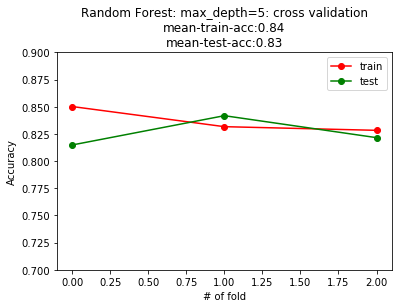

In [66]:
model = xgb.XGBClassifier(max_depth=3, n_estimators=15, subsample=0.8, random_state=2018)
result = cross_validate(model, X, y, scoring='accuracy', cv=3)
plot_result("Random Forest: max_depth=%s" % max_depth, result, ylim=(0.7, 0.9))

## Links
- [Kernels](https://www.kaggle.com/c/titanic/kernels)
